In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [59]:
#3.1.1
#To - do - 1 

# 1. Read and observer dataset 
df = pd.read_csv("student.csv")


# 2. print top(5) and bottom(5) of the dataset
print(f"Top(5) of the dataset:\n {df.head()}\n")
print(f"Bottom(5) of the dataset:\n {df.tail()}")

Top(5) of the dataset:
    Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

Bottom(5) of the dataset:
      Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72


In [60]:
# 3. print the information of the dataset
print(f"The information of the dataset are: \n {df.info}")

The information of the dataset are: 
 <bound method DataFrame.info of      Math  Reading  Writing
0      48       68       63
1      62       81       72
2      79       80       78
3      76       83       79
4      59       64       62
..    ...      ...      ...
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72

[1000 rows x 3 columns]>


In [61]:
# 4. gather and describe info about the dataset
print(f"The description info about the dataset: \n{df.describe()}")

The description info about the dataset: 
              Math      Reading      Writing
count  1000.000000  1000.000000  1000.000000
mean     67.290000    69.872000    68.616000
std      15.085008    14.657027    15.241287
min      13.000000    19.000000    14.000000
25%      58.000000    60.750000    58.000000
50%      68.000000    70.000000    69.500000
75%      78.000000    81.000000    79.000000
max     100.000000   100.000000   100.000000


In [62]:
# 5. split your data into Feature(X) and Label(Y)
X = df.drop("Writing", axis = 1).values
Y = df["Writing"].values

In [64]:
#to-do-3

#split the dataset into training and test set
def train_test(X, Y, test_size = 0.2, random_state = 42):
    np.random.seed(random_state)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * (1 - test_size))

    train_idx = indices[:split]
    test_idx = indices[split:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]
X_train, X_test, Y_train, Y_test = train_test(X, Y)

In [65]:
#to-do-4

def cost_function(X,Y,W):
    a = len(Y)

    Y_pred = X @ W
    cost = (1 / (2 * a)) * np.sum((Y_pred - Y) ** 2)
    return cost

In [66]:
#to-do-5

X_test = np.array([[1, 2], [3, 4], [5, 6]])
Y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])

cost = cost_function(X_test, Y_test, W_test)

if cost == 0:
    print("Proceed Further")
else:
    print("Something went wrong")

print("Cost:", cost)

Proceed Further
Cost: 0.0


In [67]:
#to-do-6

def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = [0] * iterations
    b = len(Y)

    for i in range(iterations):
        # Prediction
        Y_pred = X @ W

        # Loss
        loss = Y_pred - Y

        # Gradient
        dw = (1 / b) * (X.T @ loss)

        # Update
        W = W - alpha * dw

        # Cost
        cost_history[i] = cost_function(X, Y, W)

    return W, cost_history

In [68]:
#to-do-7

np.random.seed(0)

X = np.random.rand(100, 3)
Y = np.random.rand(100)
W = np.random.rand(3)

alpha = 0.01
iterations = 1000

final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)

print("Final Parameters:", final_params)
print("Final Cost:", cost_history[-1])

Final Parameters: [0.20551667 0.54295081 0.10388027]
Final Cost: 0.05435492255484332


In [69]:
#to-do-8

def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))

In [70]:
#to-do-9

def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

In [73]:
#to-do-10

# Load data
data = pd.read_csv("student.csv")

# Features & target
X = data[["Math", "Reading"]].values
Y = data["Writing"].values

# Manual train-test split
X_train, X_test, Y_train, Y_test = train_test(X, Y)

# Initialize weights
W = np.zeros(X_train.shape[1])
alpha = 0.00001
iterations = 1000

# Train
W_optimal, cost_history = gradient_descent(
    X_train, Y_train, W, alpha, iterations
)

# Predict
Y_pred = X_test @ W_optimal

# Evaluate
print("Final Weights:", W_optimal)
print("Cost History (first 10):", cost_history[:10])
print("RMSE:", rmse(Y_test, Y_pred))
print("R^2 Score:", r2(Y_test, Y_pred))

Final Weights: [0.3533225  0.64122757]
Cost History (first 10): [np.float64(2006.8394800833137), np.float64(1635.774663328632), np.float64(1333.9065466008485), np.float64(1088.331038315821), np.float64(888.5504563091043), np.float64(726.0247704585537), np.float64(593.806531475263), np.float64(486.2438797132194), np.float64(398.73893814866733), np.float64(327.5512612556366)]
RMSE: 5.258385317376058
R^2 Score: 0.8688492410749991


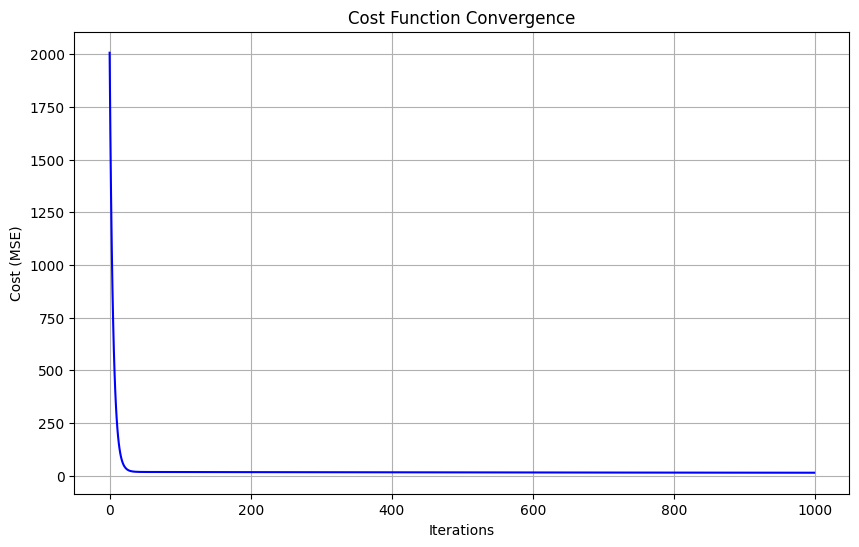

In [74]:
#to-do-11

#1
def plot_cost(cost_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.title('Cost Function Convergence')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.show()

plot_cost(cost_history)

Model shows acceptable performance. No clear overfitting is observed and performance is limited due to absence of bias term.

In [75]:
#2
learning_rates = [0.000001, 0.00001, 0.0001]

for alpha in learning_rates:
    print("\nLearning rate:", alpha)

    W = np.zeros(X_train.shape[1])
    iterations = 1000

    W_optimal, cost_history = gradient_descent(
        X_train, Y_train, W, alpha, iterations
    )

    Y_pred = X_test @ W_optimal

    print("  Final Cost:", cost_history[-1])
    print("  RMSE:", rmse(Y_test, Y_pred))
    print("  R²:", r2(Y_test, Y_pred))


Learning rate: 1e-06
  Final Cost: 16.54907927050052
  RMSE: 5.912873961371951
  R²: 0.8341699475180014

Learning rate: 1e-05
  Final Cost: 13.319130562901126
  RMSE: 5.258385317376058
  R²: 0.8688492410749991

Learning rate: 0.0001
  Final Cost: 10.466845799236548
  RMSE: 4.611584645254859
  R²: 0.8991289912947937
